# Heart Attack Risk Dataset

## 1. Data Import

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df0 = pd.read_csv('heart_attack_dataset.csv')

In [3]:
df0.head()

Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   

         BMI  Triglycerides  Physical Activity Days Per Week  \
0  31.251233            286                                0   
1  27.194973            235                                1   
2  28.176571            587                                4   
3  36.464704            378                                3   
4  21.809144            231                                1   

   Sleep Hours Per Day    Country      Continent           Hemisphere  \
0                    6  Argentina  South America  Southern Hemisphere   
1                    7     Canada  North America  Northern Hemisphere   
2                    4     France         Europe  Northern Hemisphere   
3                    4     Canada  North America  Northern Hemisphere   
4                    5   Thailand           Asia  Northern Hemisphere   

   Heart Attack Risk  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 26 columns]

## 2. Data Exploration and Preprocessing

### 2.1 Exploratory Data Analysis (EDA)

In [4]:
df0.shape

(8763, 26)

In [5]:
df0.dtypes

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

In [6]:
# checking missing values
df0.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [7]:
df0.duplicated().sum()

0

In [8]:
# splitting data in categorical and numerical

categorical_data = df0.select_dtypes('object')

In [9]:
categorical_data.head()

Patient ID     Sex Blood Pressure       Diet    Country      Continent  \
0    BMW7812    Male         158/88    Average  Argentina  South America   
1    CZE1114    Male         165/93  Unhealthy     Canada  North America   
2    BNI9906  Female         174/99    Healthy     France         Europe   
3    JLN3497    Male        163/100    Average     Canada  North America   
4    GFO8847    Male          91/88  Unhealthy   Thailand           Asia   

            Hemisphere  
0  Southern Hemisphere  
1  Northern Hemisphere  
2  Northern Hemisphere  
3  Northern Hemisphere  
4  Northern Hemisphere

In [10]:
categorical_data.describe()

Patient ID   Sex Blood Pressure     Diet  Country Continent  \
count        8763  8763           8763     8763     8763      8763   
unique       8763     2           3915        3       20         6   
top       BMW7812  Male         146/94  Healthy  Germany      Asia   
freq            1  6111              8     2960      477      2543   

                 Hemisphere  
count                  8763  
unique                    2  
top     Northern Hemisphere  
freq                   5660

In [11]:
numerical_data = df0.select_dtypes('number')
numerical_data.head()

Age  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  Obesity  \
0   67          208          72         0               0        1        0   
1   21          389          98         1               1        1        1   
2   21          324          72         1               0        0        0   
3   84          383          73         1               1        1        0   
4   66          318          93         1               1        1        1   

   Alcohol Consumption  Exercise Hours Per Week  Previous Heart Problems  \
0                    0                 4.168189                        0   
1                    1                 1.813242                        1   
2                    0                 2.078353                        1   
3                    1                 9.828130                        1   
4                    0                 5.804299                        1   

   Medication Use  Stress Level  Sedentary Hours Per Day  Income        BMI  \
0               0             9                 6.615001  261404  31.251233   
1               0             1                 4.963459  285768  27.194973   
2               1             9                 9.463426  235282  28.176571   
3               0             9                 7.648981  125640  36.464704   
4               0             6                 1.514821  160555  21.809144   

   Triglycerides  Physical Activity Days Per Week  Sleep Hours Per Day  \
0            286                                0                    6   
1            235                                1                    7   
2            587                                4                    4   
3            378                                3                    4   
4            231                                1                    5   

   Heart Attack Risk  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

In [12]:
numerical_data.describe()

Age  Cholesterol   Heart Rate     Diabetes  Family History  \
count  8763.000000  8763.000000  8763.000000  8763.000000     8763.000000   
mean     53.707977   259.877211    75.021682     0.652288        0.492982   
std      21.249509    80.863276    20.550948     0.476271        0.499979   
min      18.000000   120.000000    40.000000     0.000000        0.000000   
25%      35.000000   192.000000    57.000000     0.000000        0.000000   
50%      54.000000   259.000000    75.000000     1.000000        0.000000   
75%      72.000000   330.000000    93.000000     1.000000        1.000000   
max      90.000000   400.000000   110.000000     1.000000        1.000000   

           Smoking      Obesity  Alcohol Consumption  Exercise Hours Per Week  \
count  8763.000000  8763.000000          8763.000000              8763.000000   
mean      0.896839     0.501426             0.598083                10.014284   
std       0.304186     0.500026             0.490313                 5.783745   
min       0.000000     0.000000             0.000000                 0.002442   
25%       1.000000     0.000000             0.000000                 4.981579   
50%       1.000000     1.000000             1.000000                10.069559   
75%       1.000000     1.000000             1.000000                15.050018   
max       1.000000     1.000000             1.000000                19.998709   

       Previous Heart Problems  Medication Use  Stress Level  \
count              8763.000000     8763.000000   8763.000000   
mean                  0.495835        0.498345      5.469702   
std                   0.500011        0.500026      2.859622   
min                   0.000000        0.000000      1.000000   
25%                   0.000000        0.000000      3.000000   
50%                   0.000000        0.000000      5.000000   
75%                   1.000000        1.000000      8.000000   
max                   1.000000        1.000000     10.000000   

       Sedentary Hours Per Day         Income          BMI  Triglycerides  \
count              8763.000000    8763.000000  8763.000000    8763.000000   
mean                  5.993690  158263.181901    28.891446     417.677051   
std                   3.466359   80575.190806     6.319181     223.748137   
min                   0.001263   20062.000000    18.002337      30.000000   
25%                   2.998794   88310.000000    23.422985     225.500000   
50%                   5.933622  157866.000000    28.768999     417.000000   
75%                   9.019124  227749.000000    34.324594     612.000000   
max                  11.999313  299954.000000    39.997211     800.000000   

       Physical Activity Days Per Week  Sleep Hours Per Day  Heart Attack Risk  
count                      8763.000000          8763.000000        8763.000000  
mean                          3.489672             7.023508           0.358211  
std                           2.282687             1.988473           0.479502  
min                           0.000000             4.000000           0.000000  
25%                           2.000000             5.000000           0.000000  
50%                           3.000000             7.000000           0.000000  
75%                           5.000000             9.000000           1.000000  
max                           7.000000            10.000000           1.000000

#### 2.2.1 Visulization

##### 2.2.1.1 Line Plot

In [13]:
numerical_data.columns

Index(['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Heart Attack Risk'],
      dtype='object')

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

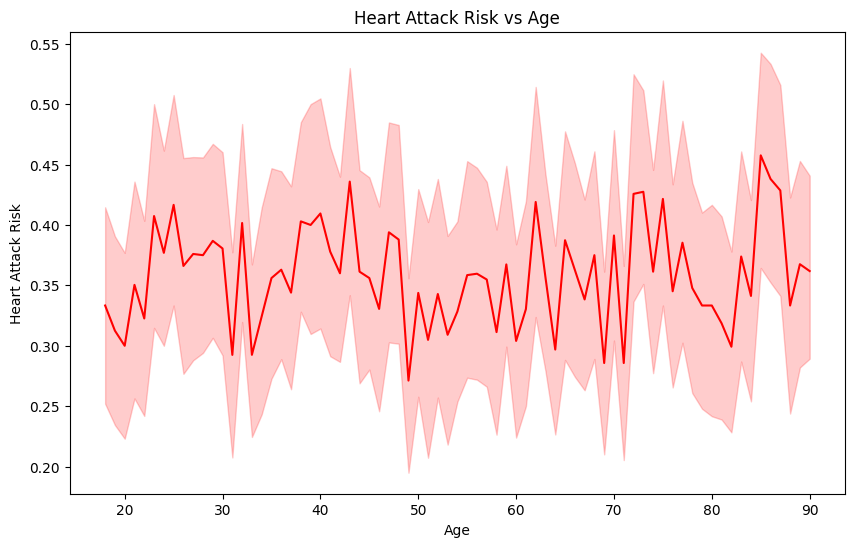

In [15]:
# Plotting Age vs Heart Attack Risk
plt.figure(figsize=(10, 6))
sns.lineplot(data=numerical_data, x='Age', y='Heart Attack Risk', c='r')
plt.title('Heart Attack Risk vs Age')
plt.xlabel('Age')
plt.ylabel('Heart Attack Risk')
plt.show()

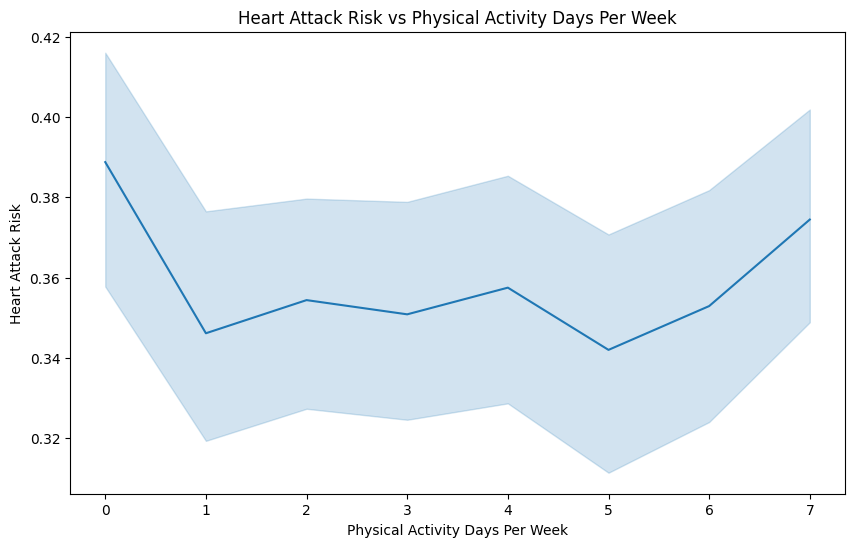

In [16]:
# Plotting Physical Activity Days Per Week vs Heart Attack Risk
plt.figure(figsize=(10, 6))
sns.lineplot(data=numerical_data, x='Physical Activity Days Per Week', y='Heart Attack Risk')
plt.title('Heart Attack Risk vs Physical Activity Days Per Week')
plt.xlabel('Physical Activity Days Per Week')
plt.ylabel('Heart Attack Risk')
plt.show()

##### 2.2.1.2 Bar Plot

In [17]:
categorical_data.columns

Index(['Patient ID', 'Sex', 'Blood Pressure', 'Diet', 'Country', 'Continent',
       'Hemisphere'],
      dtype='object')

Sex
Male      6111
Female    2652
Name: count, dtype: int64


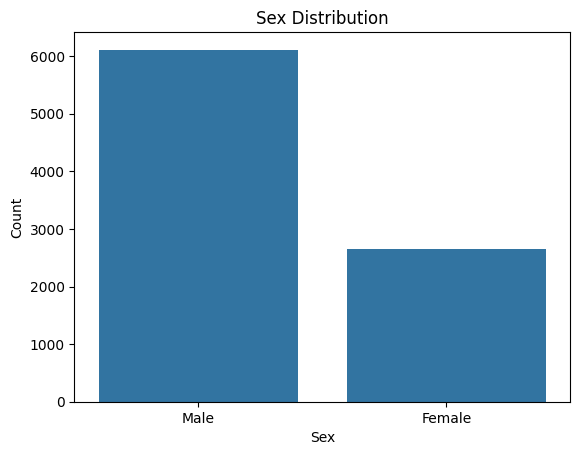

In [18]:
# for checking number of male and female
count_sex_data = categorical_data['Sex'].value_counts()
print(count_sex_data)
#plotting 
sns.countplot(x='Sex', data=categorical_data)
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

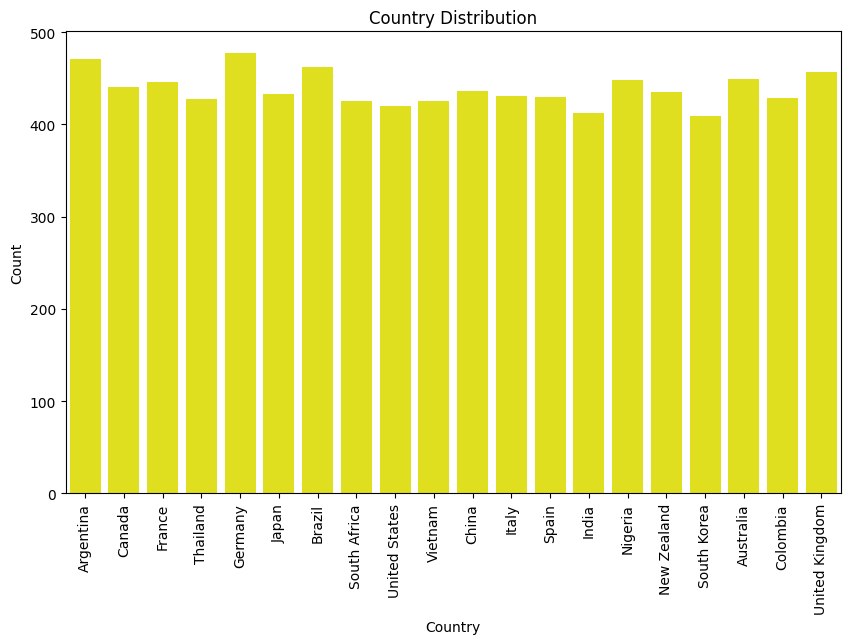

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x='Country', data=categorical_data, color='yellow')
plt.title('Country Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Diet
Healthy      2960
Average      2912
Unhealthy    2891
Name: count, dtype: int64
 
Sex
Male      6111
Female    2652
Name: count, dtype: int64


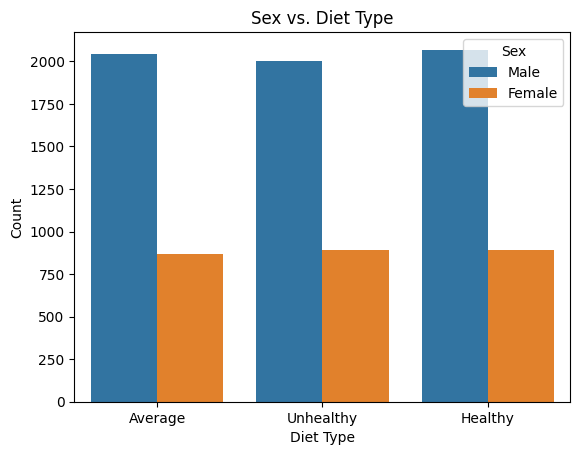

In [20]:
print(categorical_data['Diet'].value_counts())
print(" ")
print(categorical_data['Sex'].value_counts())
#plotting
sns.countplot(x='Diet', hue='Sex', data=categorical_data)
plt.title('Sex vs. Diet Type')
plt.xlabel('Diet Type')
plt.ylabel('Count')
plt.show()


##### 2.2.1.3 Histogram

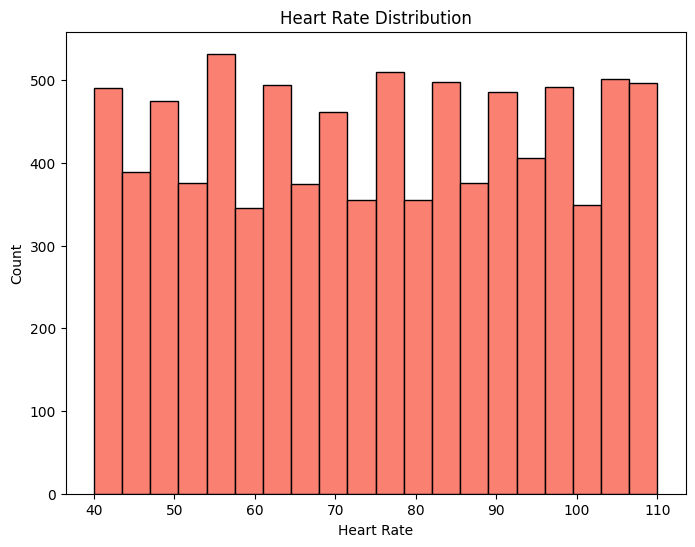

In [21]:
plt.figure(figsize=(8, 6))
plt.hist(numerical_data['Heart Rate'], bins=20, color='salmon', edgecolor='black')
plt.xlabel('Heart Rate')
plt.ylabel('Count')
plt.title('Heart Rate Distribution')
plt.show()


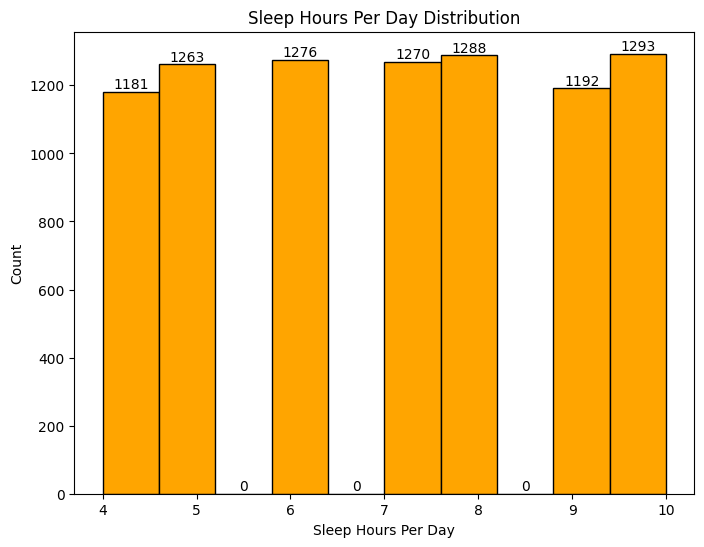

In [22]:
plt.figure(figsize=(8, 6))
# Plotting the histogram
n, bins, patches = plt.hist(numerical_data['Sleep Hours Per Day'], bins=10, color='orange', edgecolor='black')

plt.xlabel('Sleep Hours Per Day')
plt.ylabel('Count')
plt.title('Sleep Hours Per Day Distribution')

# Adding the count labels above each bar
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, n[i], int(n[i]), 
             ha='center', va='bottom', fontsize=10, color='black')

plt.show()


##### 2.2.1.4 Bubbleplot


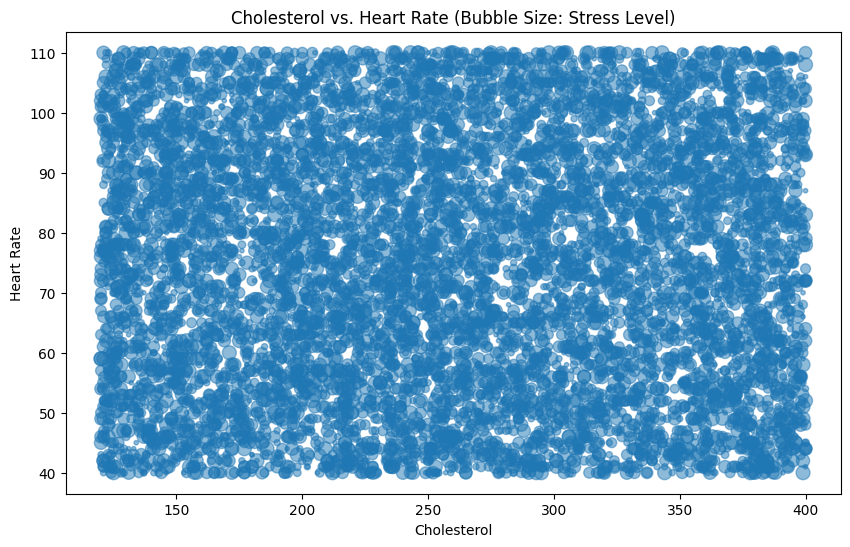

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(x='Cholesterol', y='Heart Rate', s=df0['Stress Level'] * 10, alpha=0.5, data=df0)
plt.title('Cholesterol vs. Heart Rate (Bubble Size: Stress Level)')
plt.xlabel('Cholesterol')
plt.ylabel('Heart Rate')
plt.show()


##### 2.2.1.4 Tree Map

In [24]:
import plotly.express as px

# Aggregating data
country_risk = df0.groupby('Country')['Heart Attack Risk'].mean().reset_index()

# Creating the treemap
fig = px.treemap(country_risk, path=['Country'], values='Heart Attack Risk',
                 title='Heart Attack Risk by Country')
fig.show()


In [25]:
print(country_risk)

           Country  Heart Attack Risk
0        Argentina           0.369427
1        Australia           0.374165
2           Brazil           0.352814
3           Canada           0.359091
4            China           0.355505
5         Colombia           0.377622
6           France           0.352018
7          Germany           0.360587
8            India           0.313107
9            Italy           0.315545
10           Japan           0.332564
11     New Zealand           0.347126
12         Nigeria           0.397321
13    South Africa           0.338824
14     South Korea           0.398533
15           Spain           0.348837
16        Thailand           0.376168
17  United Kingdom           0.350109
18   United States           0.395238
19         Vietnam           0.348235


In [26]:
# Aggregating data
diet_income = df0.groupby('Diet')['Income'].mean().reset_index()

# Creating the treemap
fig = px.treemap(diet_income, path=['Diet'], values='Income',
                 title='Average Income by Diet')
fig.show()


##### 2.2.1.5 Boxplot

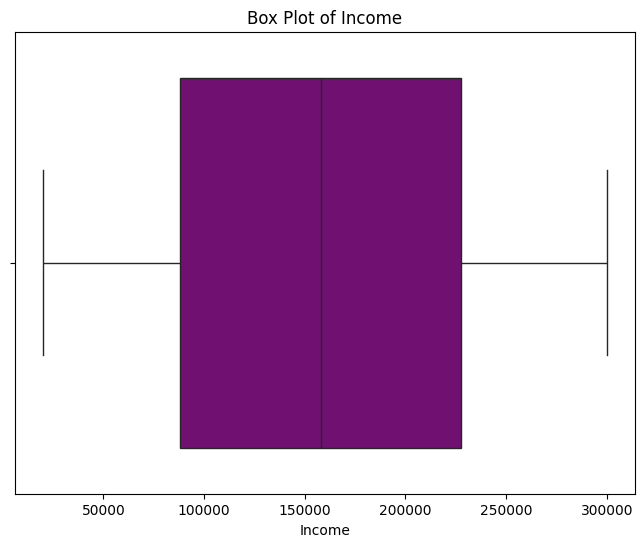

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df0['Income'], color='purple')
plt.title('Box Plot of Income')
plt.xlabel('Income')
plt.show()

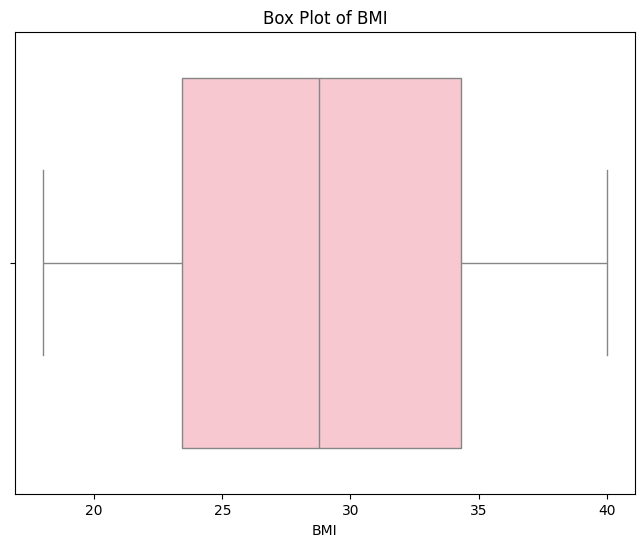

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df0['BMI'], color='pink')
plt.title('Box Plot of BMI')
plt.xlabel('BMI')
plt.show()




##### 2.2.1.5 Heatmap

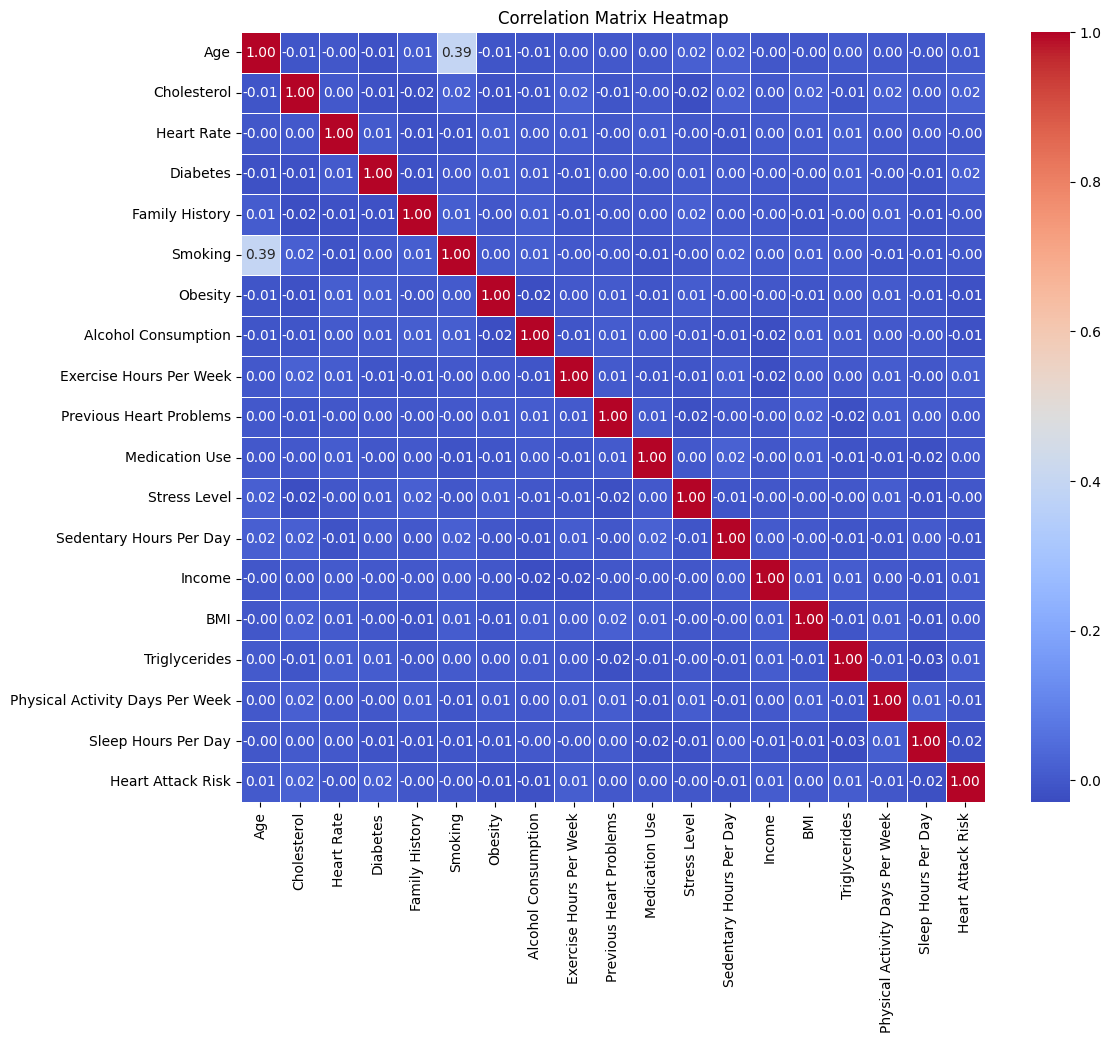

In [29]:


# Calculate the correlation matrix=
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


### 2.2 Feature Engineering

In [30]:
categorical_data['Blood Pressure'][0]

'158/88'

In [31]:
categorical_data['Blood Pressure'][0].split("/")[0]

'158'

In [32]:
# Splitting the 'Blood Pressure' column into two separate columns
categorical_data[['Blood_Pressure_n', 'Blood_Pressure_d']] = categorical_data['Blood Pressure'].str.split("/", expand=True)

# updating on main df
df0[['Blood_Pressure_n', 'Blood_Pressure_d']] = categorical_data['Blood Pressure'].str.split("/", expand=True)
#droping main feature after splitting
df0 = df0.drop('Blood Pressure', axis=1)
categorical_data.head()

Patient ID     Sex Blood Pressure       Diet    Country      Continent  \
0    BMW7812    Male         158/88    Average  Argentina  South America   
1    CZE1114    Male         165/93  Unhealthy     Canada  North America   
2    BNI9906  Female         174/99    Healthy     France         Europe   
3    JLN3497    Male        163/100    Average     Canada  North America   
4    GFO8847    Male          91/88  Unhealthy   Thailand           Asia   

            Hemisphere Blood_Pressure_n Blood_Pressure_d  
0  Southern Hemisphere              158               88  
1  Northern Hemisphere              165               93  
2  Northern Hemisphere              174               99  
3  Northern Hemisphere              163              100  
4  Northern Hemisphere               91               88

#### 2.2.1 Label Encoder

In [33]:
# applying label encoder to diet
from sklearn.preprocessing import LabelEncoder

In [34]:
label_encoder = LabelEncoder()

In [35]:
df0['Diet'] = label_encoder.fit_transform(df0['Diet'])

In [36]:
df0['Diet']

0       0
1       2
2       1
3       0
4       2
       ..
8758    1
8759    1
8760    0
8761    2
8762    1
Name: Diet, Length: 8763, dtype: int32

#### 2.2.2 One Hot Encoding

In [37]:
from sklearn.preprocessing import OneHotEncoder

In [38]:
ohe_features = df0[['Sex', "Continent", 'Hemisphere']]
ohe_features.head()

Sex      Continent           Hemisphere
0    Male  South America  Southern Hemisphere
1    Male  North America  Northern Hemisphere
2  Female         Europe  Northern Hemisphere
3    Male  North America  Northern Hemisphere
4    Male           Asia  Northern Hemisphere

In [39]:
#initilizing 
ohe = OneHotEncoder()
#encoding
new_ohe_features = ohe.fit_transform(ohe_features)
#new dataframe
ohe_df = pd.DataFrame(new_ohe_features.toarray(), columns=ohe.get_feature_names_out(), dtype=int)
#display
ohe_df.head()

Sex_Female  Sex_Male  Continent_Africa  Continent_Asia  \
0           0         1                 0               0   
1           0         1                 0               0   
2           1         0                 0               0   
3           0         1                 0               0   
4           0         1                 0               1   

   Continent_Australia  Continent_Europe  Continent_North America  \
0                    0                 0                        0   
1                    0                 0                        1   
2                    0                 1                        0   
3                    0                 0                        1   
4                    0                 0                        0   

   Continent_South America  Hemisphere_Northern Hemisphere  \
0                        1                               0   
1                        0                               1   
2                        0                               1   
3                        0                               1   
4                        0                               1   

   Hemisphere_Southern Hemisphere  
0                               1  
1                               0  
2                               0  
3                               0  
4                               0

In [40]:
#removing the encoded main features
df0 = df0.drop(columns=['Sex', "Continent", 'Hemisphere'], axis=1)

In [41]:
df0.shape

(8763, 24)

In [42]:
#joining dataframe

df = pd.concat([df0,ohe_df], axis =1)

In [43]:
df.head()

Patient ID  Age  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  \
0    BMW7812   67          208          72         0               0        1   
1    CZE1114   21          389          98         1               1        1   
2    BNI9906   21          324          72         1               0        0   
3    JLN3497   84          383          73         1               1        1   
4    GFO8847   66          318          93         1               1        1   

   Obesity  Alcohol Consumption  Exercise Hours Per Week  ...  Sex_Female  \
0        0                    0                 4.168189  ...           0   
1        1                    1                 1.813242  ...           0   
2        0                    0                 2.078353  ...           1   
3        0                    1                 9.828130  ...           0   
4        1                    0                 5.804299  ...           0   

   Sex_Male  Continent_Africa  Continent_Asia  Continent_Australia  \
0         1                 0               0                    0   
1         1                 0               0                    0   
2         0                 0               0                    0   
3         1                 0               0                    0   
4         1                 0               1                    0   

   Continent_Europe  Continent_North America  Continent_South America  \
0                 0                        0                        1   
1                 0                        1                        0   
2                 1                        0                        0   
3                 0                        1                        0   
4                 0                        0                        0   

   Hemisphere_Northern Hemisphere  Hemisphere_Southern Hemisphere  
0                               0                               1  
1                               1                               0  
2                               1                               0  
3                               1                               0  
4                               1                               0  

[5 rows x 34 columns]

### 2.3 Normalize/Standardize Features

In [44]:
numerical_data.head()

Age  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  Obesity  \
0   67          208          72         0               0        1        0   
1   21          389          98         1               1        1        1   
2   21          324          72         1               0        0        0   
3   84          383          73         1               1        1        0   
4   66          318          93         1               1        1        1   

   Alcohol Consumption  Exercise Hours Per Week  Previous Heart Problems  \
0                    0                 4.168189                        0   
1                    1                 1.813242                        1   
2                    0                 2.078353                        1   
3                    1                 9.828130                        1   
4                    0                 5.804299                        1   

   Medication Use  Stress Level  Sedentary Hours Per Day  Income        BMI  \
0               0             9                 6.615001  261404  31.251233   
1               0             1                 4.963459  285768  27.194973   
2               1             9                 9.463426  235282  28.176571   
3               0             9                 7.648981  125640  36.464704   
4               0             6                 1.514821  160555  21.809144   

   Triglycerides  Physical Activity Days Per Week  Sleep Hours Per Day  \
0            286                                0                    6   
1            235                                1                    7   
2            587                                4                    4   
3            378                                3                    4   
4            231                                1                    5   

   Heart Attack Risk  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

In [45]:
df0.columns

Index(['Patient ID', 'Age', 'Cholesterol', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems',
       'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income',
       'BMI', 'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Country', 'Heart Attack Risk',
       'Blood_Pressure_n', 'Blood_Pressure_d'],
      dtype='object')

In [46]:
std_df = numerical_data[['Age','Cholesterol','Heart Rate','Income','BMI']]
new_bloodpressure = df0[['Blood_Pressure_n','Blood_Pressure_d']]

std_df = pd.concat([std_df, new_bloodpressure], axis =1)


In [47]:
std_df.head()

Age  Cholesterol  Heart Rate  Income        BMI Blood_Pressure_n  \
0   67          208          72  261404  31.251233              158   
1   21          389          98  285768  27.194973              165   
2   21          324          72  235282  28.176571              174   
3   84          383          73  125640  36.464704              163   
4   66          318          93  160555  21.809144               91   

  Blood_Pressure_d  
0               88  
1               93  
2               99  
3              100  
4               88

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
std_scaler = StandardScaler()

In [50]:
new_std_scaler = std_scaler.fit_transform(std_df)

In [51]:
new_std_df = pd.DataFrame(new_std_scaler, columns=['Age_scaled','Cholesterol_scaled','Heart Rate_scaled','Income_scaled',
                                                   'BMI_scaled','Blood_Pressure_n_scaled','Blood_Pressure_d_scaled'], dtype=float)

In [52]:
new_std_df.head()

Age_scaled  Cholesterol_scaled  Heart Rate_scaled  Income_scaled  \
0    0.625557           -0.641579          -0.147042       1.280130   
1   -1.539322            1.596895           1.118179       1.582523   
2   -1.539322            0.793023          -0.147042       0.955917   
3    1.425621            1.522691          -0.098380      -0.404902   
4    0.578495            0.718820           0.874867       0.028445   

   BMI_scaled  Blood_Pressure_n_scaled  Blood_Pressure_d_scaled  
0    0.373454                 0.870044                 0.193782  
1   -0.268479                 1.135714                 0.534480  
2   -0.113134                 1.477290                 0.943319  
3    1.198524                 1.059809                 1.011458  
4   -1.120826                -1.672797                 0.193782

In [53]:
df = pd.concat([df,new_std_df], axis=1)

In [54]:
df.head()

Patient ID  Age  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  \
0    BMW7812   67          208          72         0               0        1   
1    CZE1114   21          389          98         1               1        1   
2    BNI9906   21          324          72         1               0        0   
3    JLN3497   84          383          73         1               1        1   
4    GFO8847   66          318          93         1               1        1   

   Obesity  Alcohol Consumption  Exercise Hours Per Week  ...  \
0        0                    0                 4.168189  ...   
1        1                    1                 1.813242  ...   
2        0                    0                 2.078353  ...   
3        0                    1                 9.828130  ...   
4        1                    0                 5.804299  ...   

   Continent_South America  Hemisphere_Northern Hemisphere  \
0                        1                               0   
1                        0                               1   
2                        0                               1   
3                        0                               1   
4                        0                               1   

   Hemisphere_Southern Hemisphere  Age_scaled  Cholesterol_scaled  \
0                               1    0.625557           -0.641579   
1                               0   -1.539322            1.596895   
2                               0   -1.539322            0.793023   
3                               0    1.425621            1.522691   
4                               0    0.578495            0.718820   

   Heart Rate_scaled  Income_scaled  BMI_scaled  Blood_Pressure_n_scaled  \
0          -0.147042       1.280130    0.373454                 0.870044   
1           1.118179       1.582523   -0.268479                 1.135714   
2          -0.147042       0.955917   -0.113134                 1.477290   
3          -0.098380      -0.404902    1.198524                 1.059809   
4           0.874867       0.028445   -1.120826                -1.672797   

   Blood_Pressure_d_scaled  
0                 0.193782  
1                 0.534480  
2                 0.943319  
3                 1.011458  
4                 0.193782  

[5 rows x 41 columns]

In [55]:
#droping the main features  after scaling
df.drop(columns=['Age','Cholesterol','Heart Rate','Income','BMI','Blood_Pressure_n','Blood_Pressure_d'], axis=True, inplace =True)

In [56]:
df.head()

Patient ID  Diabetes  Family History  Smoking  Obesity  Alcohol Consumption  \
0    BMW7812         0               0        1        0                    0   
1    CZE1114         1               1        1        1                    1   
2    BNI9906         1               0        0        0                    0   
3    JLN3497         1               1        1        0                    1   
4    GFO8847         1               1        1        1                    0   

   Exercise Hours Per Week  Diet  Previous Heart Problems  Medication Use  \
0                 4.168189     0                        0               0   
1                 1.813242     2                        1               0   
2                 2.078353     1                        1               1   
3                 9.828130     0                        1               0   
4                 5.804299     2                        1               0   

   ...  Continent_South America  Hemisphere_Northern Hemisphere  \
0  ...                        1                               0   
1  ...                        0                               1   
2  ...                        0                               1   
3  ...                        0                               1   
4  ...                        0                               1   

   Hemisphere_Southern Hemisphere  Age_scaled  Cholesterol_scaled  \
0                               1    0.625557           -0.641579   
1                               0   -1.539322            1.596895   
2                               0   -1.539322            0.793023   
3                               0    1.425621            1.522691   
4                               0    0.578495            0.718820   

  Heart Rate_scaled  Income_scaled  BMI_scaled  Blood_Pressure_n_scaled  \
0         -0.147042       1.280130    0.373454                 0.870044   
1          1.118179       1.582523   -0.268479                 1.135714   
2         -0.147042       0.955917   -0.113134                 1.477290   
3         -0.098380      -0.404902    1.198524                 1.059809   
4          0.874867       0.028445   -1.120826                -1.672797   

   Blood_Pressure_d_scaled  
0                 0.193782  
1                 0.534480  
2                 0.943319  
3                 1.011458  
4                 0.193782  

[5 rows x 34 columns]

 ### 2.4 Feature Selection

In [57]:
df.columns

Index(['Patient ID', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Heart Attack Risk', 'Sex_Female', 'Sex_Male', 'Continent_Africa',
       'Continent_Asia', 'Continent_Australia', 'Continent_Europe',
       'Continent_North America', 'Continent_South America',
       'Hemisphere_Northern Hemisphere', 'Hemisphere_Southern Hemisphere',
       'Age_scaled', 'Cholesterol_scaled', 'Heart Rate_scaled',
       'Income_scaled', 'BMI_scaled', 'Blood_Pressure_n_scaled',
       'Blood_Pressure_d_scaled'],
      dtype='object')

In [58]:
df.shape

(8763, 34)

In [59]:
#removing featurs that doesnot impact on predicting
df = df.drop(columns=['Patient ID','Triglycerides','Country'])

In [60]:
df.shape

(8763, 31)

## 3. Model Building

In [62]:
df.head()

Diabetes  Family History  Smoking  Obesity  Alcohol Consumption  \
0         0               0        1        0                    0   
1         1               1        1        1                    1   
2         1               0        0        0                    0   
3         1               1        1        0                    1   
4         1               1        1        1                    0   

   Exercise Hours Per Week  Diet  Previous Heart Problems  Medication Use  \
0                 4.168189     0                        0               0   
1                 1.813242     2                        1               0   
2                 2.078353     1                        1               1   
3                 9.828130     0                        1               0   
4                 5.804299     2                        1               0   

   Stress Level  ...  Continent_South America  Hemisphere_Northern Hemisphere  \
0             9  ...                        1                               0   
1             1  ...                        0                               1   
2             9  ...                        0                               1   
3             9  ...                        0                               1   
4             6  ...                        0                               1   

   Hemisphere_Southern Hemisphere  Age_scaled  Cholesterol_scaled  \
0                               1    0.625557           -0.641579   
1                               0   -1.539322            1.596895   
2                               0   -1.539322            0.793023   
3                               0    1.425621            1.522691   
4                               0    0.578495            0.718820   

   Heart Rate_scaled  Income_scaled  BMI_scaled  Blood_Pressure_n_scaled  \
0          -0.147042       1.280130    0.373454                 0.870044   
1           1.118179       1.582523   -0.268479                 1.135714   
2          -0.147042       0.955917   -0.113134                 1.477290   
3          -0.098380      -0.404902    1.198524                 1.059809   
4           0.874867       0.028445   -1.120826                -1.672797   

   Blood_Pressure_d_scaled  
0                 0.193782  
1                 0.534480  
2                 0.943319  
3                 1.011458  
4                 0.193782  

[5 rows x 31 columns]

### Logistic Regression

In [63]:
#splitting data to X and y

In [64]:
df.columns

Index(['Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Heart Attack Risk', 'Sex_Female', 'Sex_Male',
       'Continent_Africa', 'Continent_Asia', 'Continent_Australia',
       'Continent_Europe', 'Continent_North America',
       'Continent_South America', 'Hemisphere_Northern Hemisphere',
       'Hemisphere_Southern Hemisphere', 'Age_scaled', 'Cholesterol_scaled',
       'Heart Rate_scaled', 'Income_scaled', 'BMI_scaled',
       'Blood_Pressure_n_scaled', 'Blood_Pressure_d_scaled'],
      dtype='object')

In [67]:
X = df.drop('Heart Attack Risk', axis=1)
y = df['Heart Attack Risk']


In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)


In [ ]:
# model training # using sklearn
from sklearn.linear_model import LogisticRegression

In [ ]:
lgr = LogisticRegression()

In [160]:
trainmodel =  lgr.fit(X_train,y_train)

LogisticRegression()

In [161]:
y_pred = lgr.predict(X_test)

In [162]:
print(y_pred)

[0 0 0 ... 0 0 0]


In [76]:
# checking accuracy 
from sklearn.metrics import accuracy_score, confusion_matrix


In [80]:
#confusion metrix
confusion_m_first = confusion_matrix(y_pred,y_test)
confusion_m_first

array([[1125,  628],
       [   0,    0]], dtype=int64)

In [78]:
#accuracy
accuracy_first = accuracy_score(y_pred,y_test)
accuracy_first

0.6417569880205363

In [81]:
#weights
lgr.coef_

array([[ 0.0802619 , -0.02795249, -0.12332862, -0.0885221 , -0.04126084,
         0.00514098,  0.01330927, -0.01749149,  0.01354686, -0.01020032,
        -0.00306045, -0.0041171 , -0.01861615, -0.09127873, -0.04191217,
         0.0428084 , -0.10172455,  0.13525145, -0.11632496, -0.07981593,
        -0.01338531,  0.01312803, -0.14631893,  0.03404073,  0.04535278,
        -0.01033805,  0.02293247,  0.02376732,  0.03674025, -0.00757258]])

In [83]:
lgr.intercept_

array([-0.13673248])

### Building logistic regression from scratch (sigmoid function)

In [86]:
X_train.shape[1]

30

In [213]:
#SIGMOID  function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

class MyLogistic:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self, X_train, y_train):
        # Adding a column of 1s to the first column of X_train to account for the intercept term
        X_train = np.insert(X_train, 0, 1, axis=1)
        
        # Initializing weights with ones (first value is intercept, others are coefficients)
        Weights = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            m = X_train.shape[0]  # Number of rows (samples)
            y_hat_calc = np.dot(X_train, Weights)  # Calculating the value of y_hat
            y_hat = sigmoid(y_hat_calc)  # Applying sigmoid function to get probabilities
            
            # Updating weights using gradient descent
            Weights = Weights + self.learning_rate * (np.dot((y_train - y_hat), X_train)) / m
        
        # Setting the coefficients and intercept
        self.coef_ = Weights[1:]
        self.intercept_ = Weights[0]
        
        return self.coef_, self.intercept_
        

    def predict(self,X_test):
        y_hat_calc = np.dot(X_test,self.coef_) + self.intercept_
        y_hat = sigmoid(y_hat_calc)
        return [1 if i >= 0.5 else 0 for i in y_hat] #lambda function


In [214]:
mlgr = MyLogistic(epochs=1000)

In [215]:
coef_, intercpet_ = mlgr.fit(X_train,y_train)

In [216]:
print(coef_)
print(intercpet_)

[ 0.48947163  0.48644699  0.36285617  0.47490035  0.44699409 -0.05265316
  0.14160037  0.48244162  0.49002716 -0.15509277 -0.1065043  -0.15228801
 -0.3997261   0.8423344   0.60236708  0.9614332   0.8734808   0.97088792
  0.81570198  0.93897806  0.88421951  0.70720225  0.73749923  0.27246996
  0.35703551  0.2620332   0.29020342  0.27537472  0.32130986  0.25283378]
0.44470147918272274


In [217]:
y_pred = mlgr.predict(X_test)

In [218]:
accuracy_score(y_pred, y_test)

0.5573302909298345

In [219]:
confusion_matrix(y_pred,y_test)

array([[757, 408],
       [368, 220]], dtype=int64)

## 4. Model Tuining

### Grid Search

In [224]:
from sklearn.model_selection import GridSearchCV

In [230]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 1000, 3000, 5000],
    'l1_ratio': [None, 0.5, 0.7, 0.9]  
}

In [232]:
# Create the GridSearchCV object
grid = GridSearchCV(estimator=lgr, param_grid=param_grid, cv=5, scoring='accuracy')



In [ ]:

# Fit the model using GridSearchCV
grid.fit(X_train, y_train)


# Display the best parameters and the best score
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

D:\Applications\Python\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

D:\Applications\Python\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

D:\Applications\Python\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

D:\Applications\Python\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

D:\Applications\Python\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

D:\Applications\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

D:\Applications\Pyth